# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns

# Load Data

In [2]:
df=pd.read_csv("data.csv",index_col=0,)
print(list(df.columns))

['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos', 'result']


Assumption: the value 2 in gender is unknown, as about 165 records contain the value 2 in gender, so it will not be fit to ignore all these records

# Data Analysis

In [3]:
df.head(10)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0
6,105,8,1,34.0,0,1,14,31,19,12,3,1,0,0
7,13,8,1,37.0,1,0,14,31,19,12,3,1,6,0
8,13,8,1,39.0,1,0,14,31,19,12,3,1,5,0
9,13,8,1,56.0,1,0,14,31,19,12,3,1,4,0


<AxesSubplot:xlabel='location', ylabel='Count'>

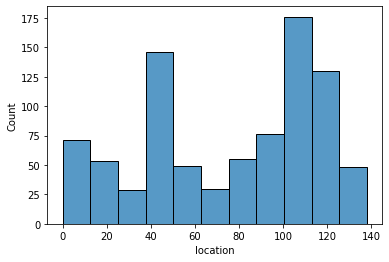

In [4]:
sns.histplot(df, x="location")

<AxesSubplot:xlabel='country', ylabel='Count'>

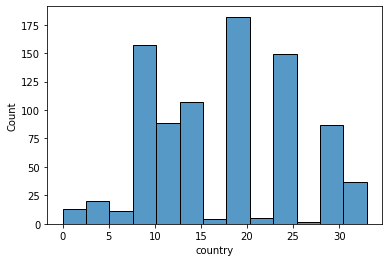

In [5]:
sns.histplot(df, x="country")

<AxesSubplot:xlabel='gender', ylabel='Count'>

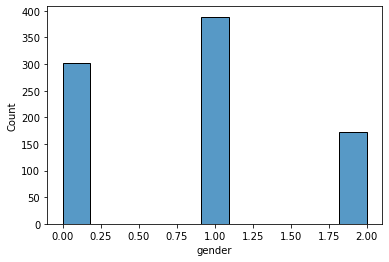

In [6]:
sns.histplot(df, x="gender")

<AxesSubplot:xlabel='age', ylabel='Count'>

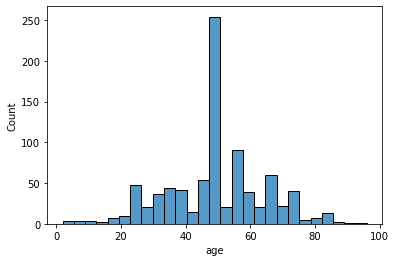

In [7]:
sns.histplot(df, x="age")

<AxesSubplot:xlabel='vis_wuhan', ylabel='Count'>

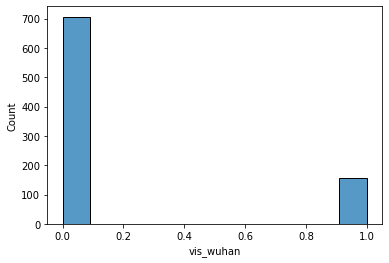

In [8]:
sns.histplot(df, x="vis_wuhan")

<AxesSubplot:xlabel='from_wuhan', ylabel='Count'>

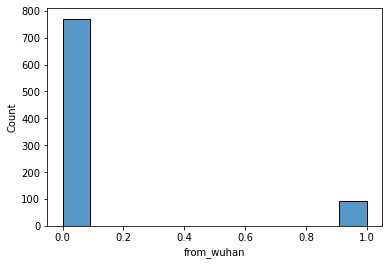

In [9]:
sns.histplot(df, x="from_wuhan")

<AxesSubplot:xlabel='symptom1', ylabel='Count'>

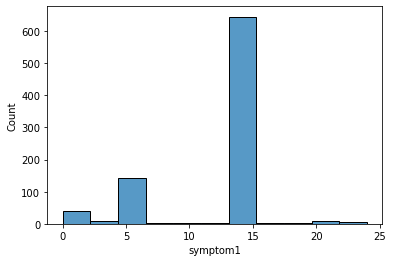

In [10]:
sns.histplot(df, x="symptom1")

<AxesSubplot:xlabel='symptom2', ylabel='Count'>

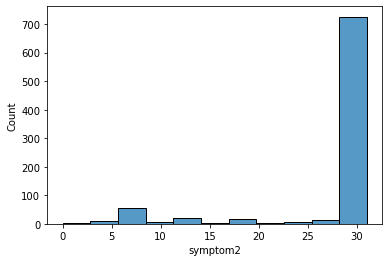

In [11]:
sns.histplot(df, x="symptom2")

<AxesSubplot:xlabel='symptom3', ylabel='Count'>

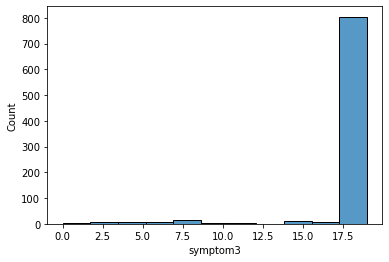

In [12]:
sns.histplot(df, x="symptom3")

<AxesSubplot:xlabel='symptom4', ylabel='Count'>

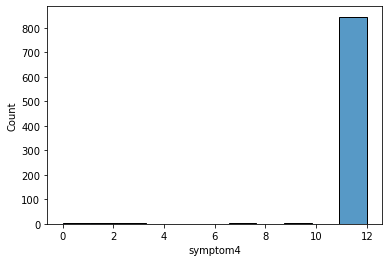

In [13]:
sns.histplot(df, x="symptom4")

<AxesSubplot:xlabel='symptom5', ylabel='Count'>

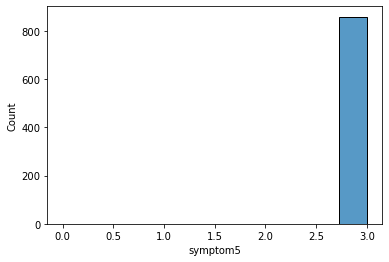

In [14]:
sns.histplot(df, x="symptom5")

<AxesSubplot:xlabel='symptom6', ylabel='Count'>

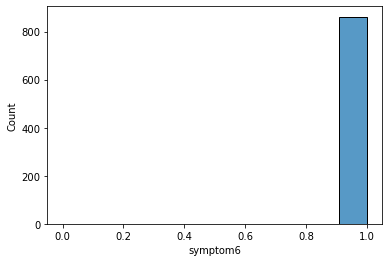

In [15]:
sns.histplot(df, x="symptom6")

<AxesSubplot:xlabel='diff_sym_hos', ylabel='Count'>

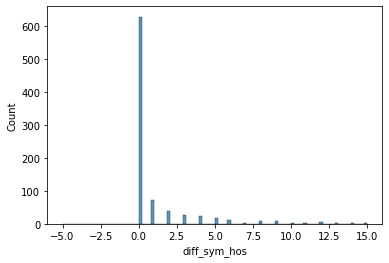

In [16]:
sns.histplot(df, x="diff_sym_hos")

# Finding Highly Correlated Features

The elemnts of the correlation matrix are the absolute value of correlation between the features. The diagonal elements are equal to 1 and the upper triangular part of the matrix is the same as the lower triangular part, thus we only printed the upper part

In [17]:
correlationMatrix = df.corr().abs()
upperTriangle = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape),k=1).astype(np.bool))
print(upperTriangle)

              location   country    gender       age  vis_wuhan  from_wuhan  \
location           NaN  0.309347  0.030077  0.027330   0.022821    0.080120   
country            NaN       NaN  0.193208  0.072339   0.149798    0.194170   
gender             NaN       NaN       NaN  0.020662   0.005588    0.138997   
age                NaN       NaN       NaN       NaN   0.157173    0.051229   
vis_wuhan          NaN       NaN       NaN       NaN        NaN    0.154200   
from_wuhan         NaN       NaN       NaN       NaN        NaN         NaN   
symptom1           NaN       NaN       NaN       NaN        NaN         NaN   
symptom2           NaN       NaN       NaN       NaN        NaN         NaN   
symptom3           NaN       NaN       NaN       NaN        NaN         NaN   
symptom4           NaN       NaN       NaN       NaN        NaN         NaN   
symptom5           NaN       NaN       NaN       NaN        NaN         NaN   
symptom6           NaN       NaN       NaN       NaN

When the absolute value of correlation is between 0.7 and 0.9, this indicate features which are considered highly correlated. After running the below code, to check we found none of the features to be highly correlated.

In [18]:
highlyCorrelated = [column for column in upperTriangle.columns if any(upperTriangle[column] > 0.7)]
print(highlyCorrelated)

[]


# Decision Trees

# Feature Selection

After seeing the histograms above, we eliminated symptom3, symptom4, symptom5 and symptom6 features. After testing, we found that this worked better than training using all features.

In [19]:
DTfeatures = ['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','diff_sym_hos']
DTx = df[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','diff_sym_hos']].values
DTy= df.result.values

# Splitting Data

After lots of practice, we found it's best to split the train and test data to a 7:3 ratio. We found it's also best to stratify so that the proportion of the values produced in the yTest is the same as the proportion of the values in yTrain.

In [20]:
from sklearn.model_selection import train_test_split
print("The number of all records",len(DTx))
DTxTrain, DTxTest, DTyTrain, DTyTest = train_test_split(DTx,DTy, test_size=0.3,random_state=3,shuffle=True,stratify=DTy)
print("The number of x records used for training",len(DTxTrain))
print("The number of x records used for testing",len(DTxTest))
print("The number of y records used for training",len(DTyTrain))
print("The number of y records used for testing",len(DTyTest))

The number of all records 863
The number of x records used for training 604
The number of x records used for testing 259
The number of y records used for training 604
The number of y records used for testing 259


# Tuning the Hyperparameters

1. From parctice: we found that n-splits 10 is the best for our model.
2. After searching, we found it's best to shuffle.
3. After searching we found it best to choose GridSearch instead of RandomizedSearch as it's possible that RandomizedSearch will not find as accurate of a result as GridSearch.
4. After lots of trials, we found it's best to set up the grid of hyperparameters values as 'criterion':['gini','entropy'],'max_depth': [3,4,5,6,7,8,9],'min_samples_split': [10,11,12,13,14,15,16,17,18,19,20],'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15]

In [21]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DTKFold= KFold(n_splits=10,shuffle=True,random_state=3)
treeClassifier = DecisionTreeClassifier()
hyperparameters= {'criterion':['gini','entropy'],'max_depth': [3,4,5,6,7,8,9],'min_samples_split': [10,11,12,13,14,15,16,17,18,19,20],'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15]}
bestModelFound=GridSearchCV(treeClassifier,hyperparameters,cv=DTKFold)
bestModelFound.fit(DTxTrain,DTyTrain)
print(bestModelFound.best_params_)
print(bestModelFound.best_score_)

bestCriterion = bestModelFound.best_params_.get('criterion')
print("The best criterion is",bestCriterion)
bestDepth = bestModelFound.best_params_.get('max_depth')
print("The best maximum depth is",bestDepth)
minSamplesSplit = bestModelFound.best_params_.get('min_samples_split')
print("The best minimum samples split is",minSamplesSplit)
minSamplesLeaf = bestModelFound.best_params_.get('min_samples_leaf')
print("The best minimum samples leaf is",minSamplesLeaf)

results= cross_val_score(DecisionTreeClassifier(criterion=bestCriterion,max_depth=bestDepth,min_samples_split=minSamplesSplit,min_samples_leaf=minSamplesLeaf,random_state=100),DTxTrain,DTyTrain,cv=10)
print(results)
print("The accuracy is :",results.mean()*100)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 14}
0.9518852459016391
The best criterion is gini
The best maximum depth is 5
The best minimum samples split is 14
The best minimum samples leaf is 6
[0.90163934 0.93442623 0.93442623 0.95081967 0.93333333 1.
 0.91666667 0.96666667 0.96666667 0.9       ]
The accuracy is : 94.0464480874317


# Training and Predicting

In [22]:
DTclassifier=DecisionTreeClassifier(criterion=bestCriterion,max_depth=bestDepth,min_samples_split=minSamplesSplit,min_samples_leaf=minSamplesLeaf,random_state=100)
DTclassifier.fit(DTxTrain,DTyTrain)
DTpredicted=DTclassifier.predict(DTxTest)

# Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(DTyTest, DTpredicted)
print(confusionMatrix)

[[223   4]
 [  2  30]]


# Precision Score, Recall Score and f1 Score

In [24]:
from sklearn.metrics import precision_score, recall_score,f1_score
DTprecisionScore=precision_score(DTyTest, DTpredicted)
print("The precision score is: ",DTprecisionScore)
DTrecallScore=recall_score(DTyTest, DTpredicted)
print("The recall score is: ",DTrecallScore)
DTf1Score=f1_score(DTyTest, DTpredicted)
print("The f1 score is: ",DTf1Score)

The precision score is:  0.8823529411764706
The recall score is:  0.9375
The f1 score is:  0.9090909090909091


# Classification Report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(DTyTest, DTpredicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       227
           1       0.88      0.94      0.91        32

    accuracy                           0.98       259
   macro avg       0.94      0.96      0.95       259
weighted avg       0.98      0.98      0.98       259



# ROC Curve and AUC

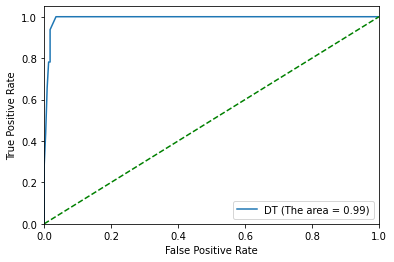

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

DTyprob = DTclassifier.predict_proba(DTxTest)
DTRocAuc = roc_auc_score(DTyTest,DTyprob[:,1])
DTfpr, DTtpr, DTthresholds = roc_curve(DTyTest,DTyprob[:,1])
plt.figure()
plt.plot(DTfpr, DTtpr, label='DT (The area = %0.2f)' % DTRocAuc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Visualization of Decision Tree

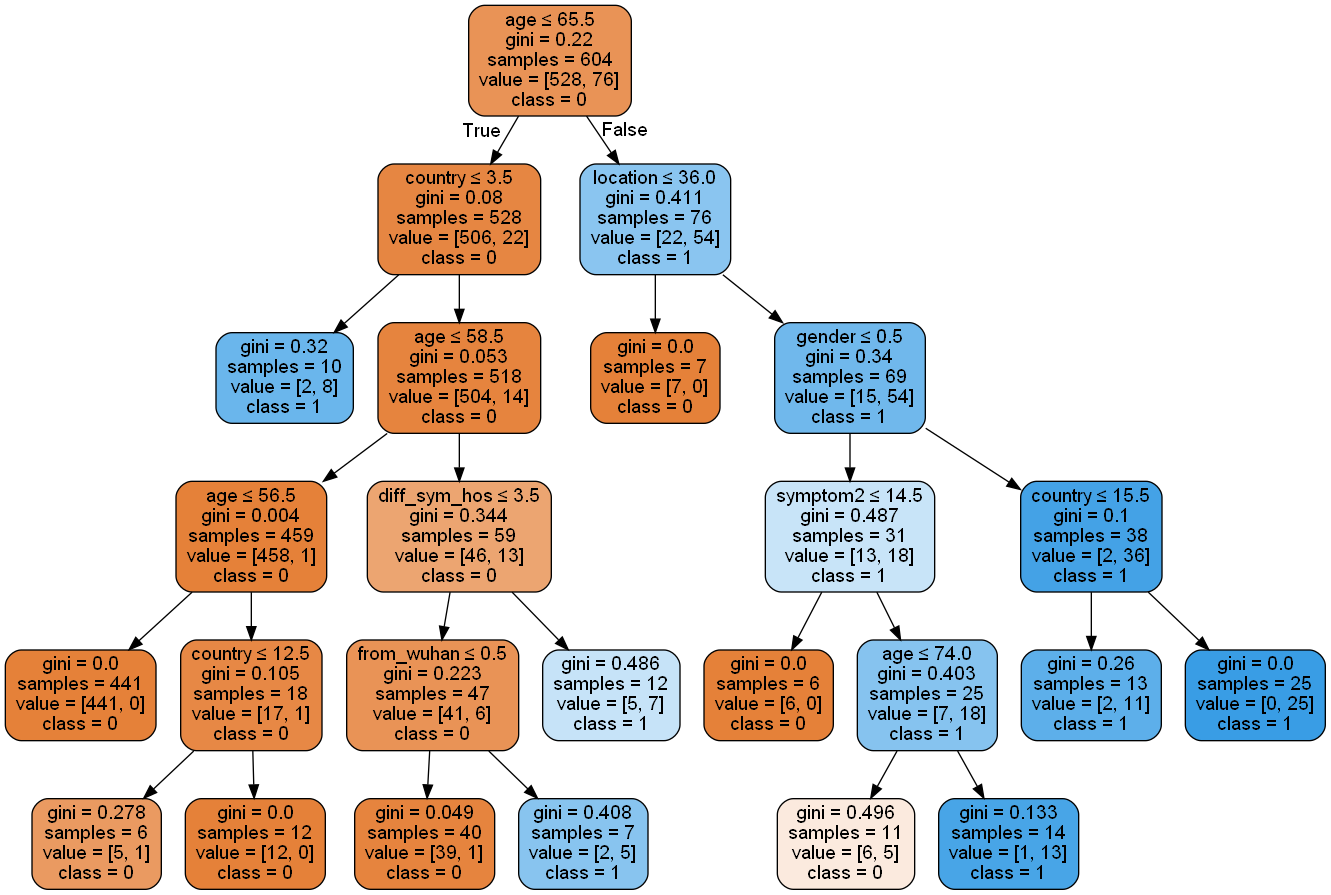

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data=StringIO()
export_graphviz(DTclassifier,out_file=dot_data,rounded=True,filled=True,special_characters=True,feature_names=DTfeatures,
                class_names=["0","1"] )
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Covid Results.png")
Image(graph.create_png())

# SVM

# Feature Selection

After seeing the histograms above, we eliminated symptom2, symptom3, symptom4, symptom5 and symptom6 features. After testing, we found that this worked better than training using all features.

In [28]:
SVMx = df[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','diff_sym_hos']].values
SVMy = df.result.values

# Plotting Two Features

It's difficult to understand 8 features plotted together, since we found that the weight of the features age and country is high, we plotted the age and country with the result before training and after testing to see the difference between the two plots. This doesn't mean that we used only these two features for training or testing the model.

<AxesSubplot:xlabel='age', ylabel='country'>

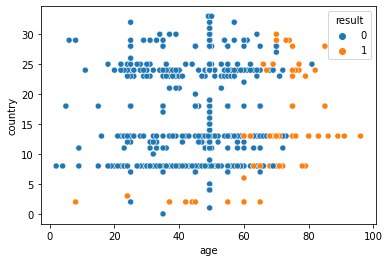

In [29]:
sns.scatterplot(data=df, x="age", y="country", hue="result")

# Splitting Data

After lots of practice, we found it's best to split the train and test data to a 7:3 ratio. We found it's also best to stratify so that the proportion of the values produced in the yTest is the same as the proportion of the values in yTrain

In [30]:
from sklearn.model_selection import train_test_split
print("The number of all records",len(SVMx))
SVMxTrain, SVMxTest, SVMyTrain, SVMyTest = train_test_split(SVMx,SVMy, test_size=0.3,random_state=3,shuffle=True,stratify=SVMy)
print("The number of x records used for training",len(SVMxTrain))
print("The number of x records used for testing",len(SVMxTest))
print("The number of y records used for training",len(SVMyTrain))
print("The number of y records used for testing",len(SVMyTest))

The number of all records 863
The number of x records used for training 604
The number of x records used for testing 259
The number of y records used for training 604
The number of y records used for testing 259


# Pipelining and Tuning the Hyperparameters

1. From parctice: we found that n-splits 10 is the best for our model.
2. After searching, we found it's best to shuffle.
3. After searching we found it best to choose GridSearch instead of RandomizedSearch as it's possible that RandomizedSearch will not find as accurate of a result as GridSearch.
4. We found it's best to use pipelining to codify and automate the workflow (scaling and classify using SVM classifier)
5. After lots of trials, we found it's best to set up the grid of hyperparameters as
       A. The best kernel was linear: "SVM__C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]
       B. The best kernel was poly: "SVMdegree": [2, 3, 4, 5], "SVMcoef0": [0, 1, 10, 100], "SVM__C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]
       C. The best kernel was rbf: "SVMgamma": ["auto", "scale"], "SVMC": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]

In [31]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SVMPipeline = Pipeline ([
    ("scaler",StandardScaler()),
    ("SVM",SVC())])

SVMKFold = KFold(n_splits=10,shuffle=True,random_state=3)

hyperparameters = [
{"SVM__kernel":
["linear"],
"SVM__C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
{"SVM__kernel":
["poly"],
"SVM__degree": [2, 3, 4, 5],
"SVM__coef0": [0, 1, 10, 100],
"SVM__C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
{"SVM__kernel":
["rbf"],
"SVM__gamma": ["auto", "scale"],
"SVM__C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
]

bestModelFound = GridSearchCV(estimator=SVMPipeline,param_grid=hyperparameters,scoring='accuracy',cv=SVMKFold,n_jobs=-1)
bestModelFound.fit(SVMxTrain,SVMyTrain)
print(bestModelFound.best_params_)
print(bestModelFound.best_score_)

bestKernel = bestModelFound.best_params_.get('SVM__kernel')
print("The best kernel is",bestKernel)
bestC= bestModelFound.best_params_.get('SVM__C')
print("The best C is",bestC)

if bestKernel == 'poly':
    bestDegree = bestModelFound.best_params_.get('SVM__degree')
    print("The best degree is",bestDegree)
    bestCoef0 = bestModelFound.best_params_.get('SVM__coef0')
    print("The best coef0 is",bestCoef0)

elif bestKernel == 'rbf':
    bestGamma=bestModelFound.best_params_.get('SVM__gamma')
    print("The best gamma is",bestGamma)

{'SVM__C': 10, 'SVM__coef0': 1, 'SVM__degree': 3, 'SVM__kernel': 'poly'}
0.9669672131147541
The best kernel is poly
The best C is 10
The best degree is 3
The best coef0 is 1


# Training and Predicting

In [32]:
if bestKernel == 'linear':
    SVM_Pipeline = Pipeline ([
    ("scaler",StandardScaler()),
    ("SVM",SVC(kernel="linear",C=bestC,probability=True,random_state=42))])
    
elif bestKernel == 'poly':
    SVM_Pipeline = Pipeline ([
    ("scaler",StandardScaler()),
    ("SVM",SVC(kernel="poly",degree=bestDegree,coef0=bestCoef0,C=bestC,probability=True,random_state=42))])

elif bestKernel == 'rbf':
    SVM_Pipeline = Pipeline ([
    ("scaler",StandardScaler()),
    ("SVM",SVC(kernel="linear",gamma=bestGamma,C=bestC,probability=True,random_state=42))])
    
SVM_Pipeline.fit(SVMxTrain, SVMyTrain) 
SVMpredicted=SVM_Pipeline.predict(SVMxTest)

# Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(SVMyTest, SVMpredicted)
print(confusionMatrix)

[[226   1]
 [  2  30]]


# Precision Score, Recall Score and f1 Score

In [34]:
from sklearn.metrics import precision_score, recall_score,f1_score
SVMprecisionScore=precision_score(SVMyTest, SVMpredicted)
print("The precision score is: ",SVMprecisionScore)
SVMrecallScore=recall_score(SVMyTest, SVMpredicted)
print("The recall score is: ",SVMrecallScore)
SVMf1Score=f1_score(SVMyTest, SVMpredicted)
print("The f1 score is: ",SVMf1Score)

The precision score is:  0.967741935483871
The recall score is:  0.9375
The f1 score is:  0.9523809523809523


# Classification Report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(SVMyTest, SVMpredicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       227
           1       0.97      0.94      0.95        32

    accuracy                           0.99       259
   macro avg       0.98      0.97      0.97       259
weighted avg       0.99      0.99      0.99       259



# ROC Curve and AUC

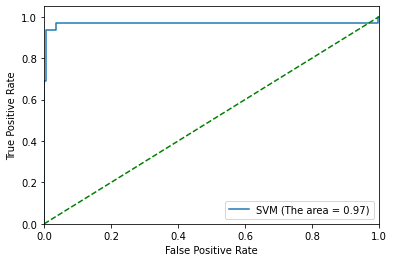

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

SVMyprob = SVM_Pipeline.predict_proba(SVMxTest)
SVMRocAuc = roc_auc_score(SVMyTest,SVMyprob[:,1])
SVMfpr, SVMtpr, SVMthresholds = roc_curve(SVMyTest,SVMyprob[:,1])
plt.figure()
plt.plot(SVMfpr, SVMtpr, label='SVM (The area = %0.2f)' % SVMRocAuc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Plotting Two Features after Testing

In [37]:
SVMtestData = {'testAge':SVMxTest[:,3] , 'testCountry': SVMxTest[:,1],'testResult':SVMpredicted }
SVMdfTest = pd.DataFrame(data=SVMtestData)

<AxesSubplot:xlabel='testAge', ylabel='testCountry'>

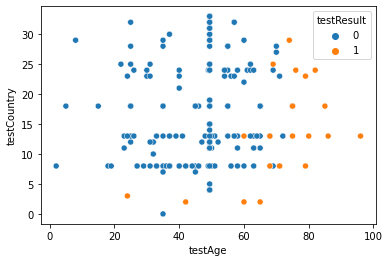

In [38]:
sns.scatterplot(data=SVMdfTest, x="testAge", y="testCountry", hue="testResult")